In [6]:
# Hypothesis 1, Model 1
# For df_renewable_energy
model_climate = smf.ols(formula='dv_response_mean ~ Q("microtargeting") + Q("false microtargeting") + Q("no microtargeting")', data=df_renewable_energy)
result_climate = model_climate.fit()

# For df_digital_privacy
model_privacy = smf.ols(formula='dv_response_mean ~ Q("microtargeting") + Q("false microtargeting") + Q("no microtargeting")', data=df_digital_privacy)
result_privacy = model_privacy.fit()

# For df_china_sanctions
model_china = smf.ols(formula='dv_response_mean ~ Q("microtargeting") + Q("false microtargeting") + Q("no microtargeting")', data=df_china_sanctions)
result_china = model_china.fit()

# For df_nato_support
model_nato = smf.ols(formula='dv_response_mean ~ Q("microtargeting") + Q("false microtargeting") + Q("no microtargeting")', data=df_nato_support)
result_nato = model_nato.fit()

# For df
model = smf.ols(formula='dv_response_mean ~ Q("microtargeting") + Q("false microtargeting") + Q("no microtargeting")', data=df)
result = model.fit()

# print the results
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       dv_response_mean   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     11.29
Date:                Sun, 23 Jul 2023   Prob (F-statistic):           2.16e-07
Time:                        13:50:26   Log-Likelihood:                -41842.
No. Observations:                8587   AIC:                         8.369e+04
Df Residuals:                    8583   BIC:                         8.372e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [ ]:
def calculate_bayes_factor(null_model, alternative_model):
    bic_null = null_model.bic
    bic_alternative = alternative_model.bic
    bayes_factor = np.exp(-0.5 * (bic_null - bic_alternative))
    return bayes_factor

# Dictionary holding data frames for each issue
models = {
    'privacy': df_digital_privacy,
    'china': df_china_sanctions,
    'nato': df_nato_support,
    'renewable': df_renewable_energy,
    'combined': df
}

for key, dataframe in models.items():
    # Comparison 1: 'no microtargeting' vs 'microtargeting'
    null_model_no_microtargeting = smf.ols(f'dv_response_mean ~ Q("no microtargeting")', data=dataframe).fit()
    alternative_model_microtargeting = smf.ols(f'dv_response_mean ~ Q("microtargeting") + Q("no microtargeting")', data=dataframe).fit()
    
    bayes_factor_no_microtargeting = calculate_bayes_factor(null_model_no_microtargeting, alternative_model_microtargeting)
    print(f"Bayes Factor {key.capitalize()} (no microtargeting vs microtargeting): {bayes_factor_no_microtargeting}")
    
    # Comparison 2: 'false microtargeting' vs 'microtargeting'
    null_model_false_microtargeting = smf.ols(f'dv_response_mean ~ Q("false microtargeting")', data=dataframe).fit()
    alternative_model_microtargeting_against_false = smf.ols(f'dv_response_mean ~ Q("microtargeting") + Q("false microtargeting")', data=dataframe).fit()
    
    bayes_factor_false_microtargeting = calculate_bayes_factor(null_model_false_microtargeting, alternative_model_microtargeting_against_false)
    print(f"Bayes Factor {key.capitalize()} (false microtargeting vs microtargeting): {bayes_factor_false_microtargeting}")
    
    # Comparison 3: 'no microtargeting' vs 'false microtargeting'
    null_model_no_against_false_microtargeting = smf.ols(f'dv_response_mean ~ Q("no microtargeting")', data=dataframe).fit()
    alternative_model_no_against_false_microtargeting = smf.ols(f'dv_response_mean ~ Q("no microtargeting") + Q("false microtargeting")', data=dataframe).fit()
    
    bayes_factor_no_against_false_microtargeting = calculate_bayes_factor(null_model_no_against_false_microtargeting, alternative_model_no_against_false_microtargeting)
    print(f"Bayes Factor {key.capitalize()} (no microtargeting vs false microtargeting): {bayes_factor_no_against_false_microtargeting}")

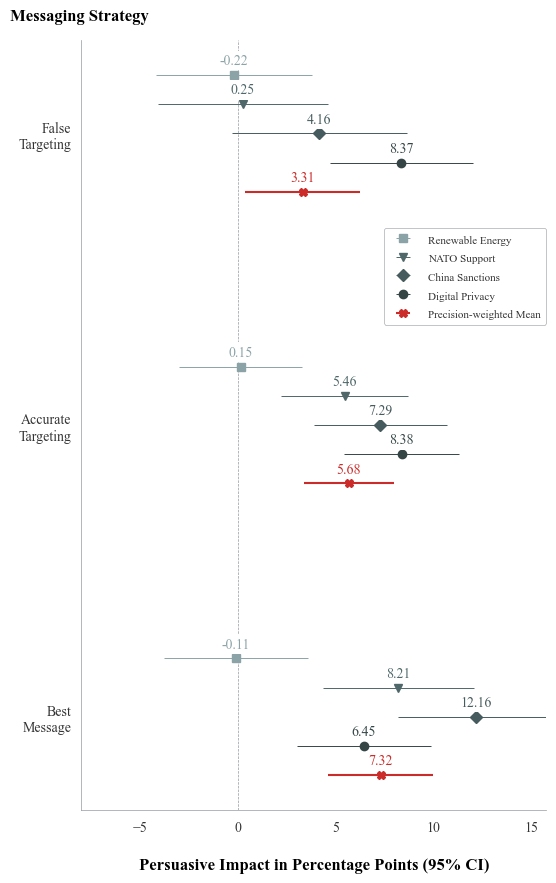

In [7]:
#FIGURE 1
# Set the font to "Times New Roman"
plt.rcParams["font.family"] = "Times New Roman"

# Define constants
DATAFRAMES = [df, df_digital_privacy, df_china_sanctions, df_nato_support, df_renewable_energy]
TITLES = ['Precision-weighted Mean', 'Digital Privacy', 'China Sanctions', 'NATO Support', 'Renewable Energy']
NEW_LABELS = {'Q("no microtargeting")': 'Best\nMessage', 'Q("microtargeting")': 'Accurate\nTargeting', 'Q("false microtargeting")': 'False\nTargeting'}
COLOR_MAP = ['#CB2C2A', '#354546', '#465B5D', '#4F6769', '#8BA3A7']
MARKERS = ['X', 'o', 'D', 'v', 's']

# Set the plot dimensions
fig, ax = plt.subplots(figsize=(6,10))

# Use floating point numbers for the y_pos array
y_pos = np.arange(len(NEW_LABELS), dtype=float) - len(DATAFRAMES)/2 * 0.1

for df_i, title, color, marker in zip(DATAFRAMES, TITLES, COLOR_MAP, MARKERS):
    # Fit the model and get the result
    result = smf.ols(formula='dv_response_mean ~ Q("microtargeting") + Q("false microtargeting") + Q("no microtargeting")', data=df_i).fit()

    # Get the confidence intervals and create a DataFrame with the coefficients and confidence intervals
    confidence_intervals = result.conf_int()
    df_coef = pd.DataFrame({'coef': result.params, 'lower': confidence_intervals[0], 'upper': confidence_intervals[1]})
    
    # Reorder and rename the labels
    df_coef = df_coef.rename(index=NEW_LABELS).reindex(NEW_LABELS.values())

    # Remove the intercept
    df_coef = df_coef.loc[df_coef.index != 'Intercept']

    # Plot coefficients with error bars and add coefficient labels
    # Set error bar line width based on the title
    if title == 'Precision-weighted Mean':
        linewidth = None
    else:
        linewidth = 0.7

    ax.errorbar(df_coef['coef'], y_pos + 0.05, 
                xerr=(df_coef['coef'] - df_coef['lower'], df_coef['upper'] - df_coef['coef']), 
                fmt=marker, color=color, ecolor=color, capsize=0, label=title, lw=linewidth)
    
    for i in range(len(df_coef)):
        ax.text(df_coef['coef'][i], y_pos[i] + 0.1, round(df_coef['coef'][i], 2), 
                va='center', ha='center', color=color, 
                bbox=dict(facecolor='white', edgecolor='none', pad=2.1))

    # Update y_pos for next plot
    y_pos += 0.1

# Configure the plot
plt.axvline(0, color='#94999E', linestyle='--', linewidth=0.5)
plt.xlim(-8, max(df_coef['upper']+12))

ax.set_xlabel('Persuasive Impact in Percentage Points (95% CI)', fontsize=12, fontweight='bold', labelpad=17)
ax.set_yticks(np.arange(len(NEW_LABELS)))
ax.set_yticklabels(NEW_LABELS.values())
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('#94999E')
ax.spines['bottom'].set_color('#94999E')
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
ax.text(-8.1, 2.4, 'Messaging Strategy', rotation=0, va='center', ha='center', fontweight='bold', fontsize=12)
ax.tick_params(colors='#333333')
ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
ax.tick_params(left=False)
ax.tick_params(bottom=False)

# Configure the legend
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles[::-1], labels[::-1], loc=(0.65, 0.63), edgecolor='#94999E')
legend.get_frame().set_linewidth(0.5)

for text in legend.get_texts():
    text.set_color('#333333')
    text.set_fontsize(8)

# Display the plot
plt.show()

# Save the figure as a PDF
fig.savefig('figure.pdf', format='pdf', bbox_inches='tight')